In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.morphology import skeletonize, binary_erosion, binary_opening, area_opening
from matplotlib import rcParams
import skimage.io
from skimage.filters import threshold_minimum, gaussian
from scipy.signal import find_peaks

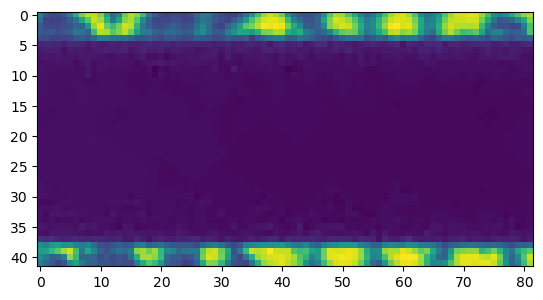

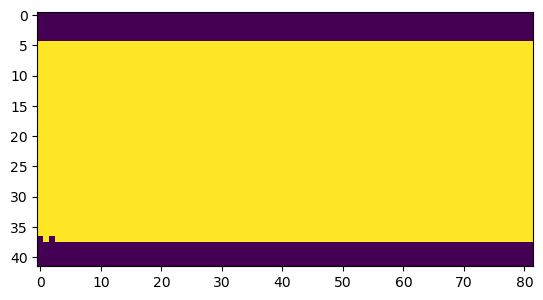

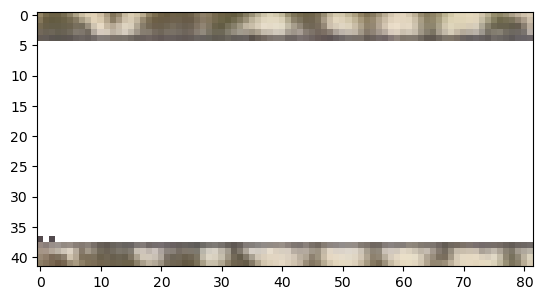

In [3]:
im = cv2.imread('fotos\\calibracion_remito_dadovuelta.tif')

im_gs = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(im_gs)

_, im_th = cv2.threshold(im_gs, 75, 255, cv2.THRESH_BINARY)

im_th = cv2.bitwise_not(im_th)

y, x  = np.where(im_th == 255)

im_show = im.copy()

im_show[y, x] = 255
plt.figure()
plt.imshow(im_th)
np.shape(im_th)

plt.figure()
plt.imshow(im_show)

32 31


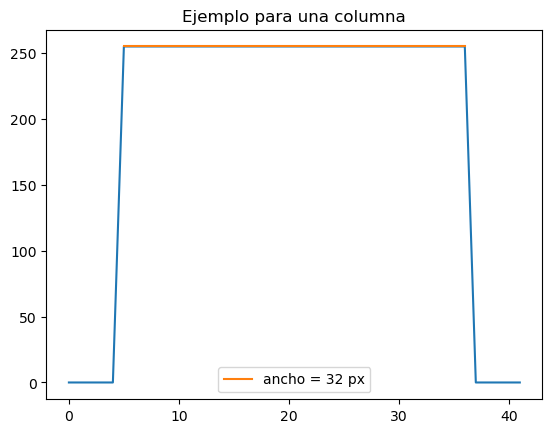

In [4]:
col = im_th[:,0]
bar = np.where(col==255)[0]
width = bar[-1] - bar[0]
print(len(bar), width)

plt.plot(col)
plt.title('Ejemplo para una columna')
plt.plot([bar[0], bar[-1]], [255, 255], label=f'ancho = {len(bar)} px')
plt.legend()

In [5]:
cols = [im_th[:, i] for i in range(np.shape(im_th)[1])]
len(cols)

widths = []
widths2 = []
for c in cols:
    bar = np.where(c==255)[0]
    width2 = len(bar)
    width = bar[-1] - bar[0]
    widths.append(width)
    widths2.append(width2)

mean_width = np.mean(widths)
width_err = np.std(widths)/np.sqrt(len(widths))

mean_width2 = np.mean(widths2)
width2_err = np.std(widths2)/np.sqrt(len(widths2))

In [6]:
WIDTH_CUERPO = 2.36
width_calibre_err = 0
WIDTH_CABEZA = 6.79


PX_PER_MM = mean_width/WIDTH_CABEZA
ERR_PX_MM = width_err/WIDTH_CABEZA
PX_PER_MM2 = mean_width2/WIDTH_CABEZA
ERR_PX_MM2 = width2_err/WIDTH_CABEZA

# print(f'ancho promedio: {mean_width} +- {width_err}')
# print(f'px per mm: {PX_PER_MM} +- {ERR_PX_MM}')

print(f'ancho2 promedio: {mean_width2} +- {width2_err}')
print(f'px per mm: {PX_PER_MM2} +- {ERR_PX_MM2}')

# print(width2_err/width_calibre, np.std(widths2)/width_calibre)

ancho2 promedio: 32.97560975609756 +- 0.017034885262672637
px per mm: 4.856496282194044 +- 0.002508819626314085
